In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
import sys
sys.path.append("../common")
import functions

# Q61 4-連結数

renketsu.pngを4-連結数により、色分けせよ。

<ipython-input-3-200939571201>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmp = np.zeros((H, W), dtype=np.int)


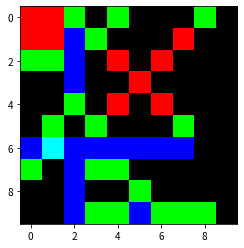

In [3]:
img = cv2.imread("renketsu.png")

H,W,C = img.shape

tmp = np.zeros((H, W), dtype=np.int)
# 二値化
tmp[img[..., 0] > 0] = 1

out = np.zeros((H, W, 3), dtype=np.uint8)
for y in range(H):
    for x in range(W):
        if tmp[y,x]<1:
            continue
        
        S = 0
        S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
        S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
        S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
        S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
        
        if S == 0:
            out[y,x] = [0, 0, 255]
        elif S == 1:
            out[y,x] = [0, 255, 0]
        elif S == 2:
            out[y,x] = [255, 0, 0]
        elif S == 3:
            out[y,x] = [255, 255, 0]
        elif S == 4:
            out[y,x] = [255, 0, 255]
                    
out = out.astype(np.uint8)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

# Q63 細線化処理 

gazo.png を細線化せよ。

細線化とは画素の幅を1にする処理であり、ここでは次のアルゴリズムに沿って処理を行え。

1. 左上からラスタスキャンする。
2. x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の3条件を満たす時にx0=0に変える。 (1) 注目画素の4近傍に0が一つ以上存在する 3. (2) x0の4-連結数が1である (3) x0の8近傍に1が3つ以上存在する
4. 一回のラスタスキャンで2の変更数が0になるまで、ラスタスキャンを繰り返す。

<ipython-input-8-33d5ce8b7ecb>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H,W),dtype=np.int)


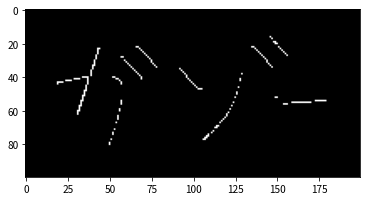

In [8]:
img = cv2.imread("gazo.png")

H,W,C = img.shape
out = np.zeros((H,W),dtype=np.int)
# 画像を0or1で表す
out[img[...,0]>0]=1

cnt=1
while(cnt>0):
    cnt = 0
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            if out[y,x]<1:
                continue
            
            c = tmp[max(y-1,0),x]+tmp[y,max(x-1,0)]+tmp[y,min(x+1,W-1)]+tmp[min(y+1,H-1),x]
            # 4連結数
            S = 0
            S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
            S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
            S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
            S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
            
            v = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
            
            # 条件(1)
            if c<4:
                # 条件(2)
                if S==1:
                    # 条件(3)
                        if v>=4:
                            out[y,x]=0
                            cnt+=1

out = out.astype(np.uint8) * 255
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))                        

# Q64 ヒルディッチの細線化

gazo.png にヒルディッチの細線化を行え。

<ipython-input-13-291001ffb032>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H,W),dtype=np.int)


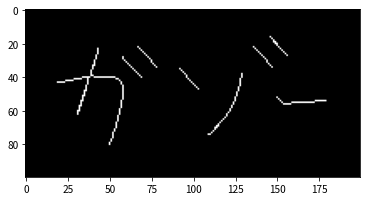

In [13]:
img = cv2.imread("gazo.png")

H,W,C = img.shape
out = np.zeros((H,W),dtype=np.int)
# 画像を0or1で表す
out[img[...,0]>0]=1

cnt=1
while(cnt>0):
    cnt = 0
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            judge=0
            if out[y,x]<1:
                continue
            
            # 4近傍の1の数をカウント
            v = tmp[max(y-1,0),x]+tmp[y,max(x-1,0)]+tmp[y,min(x+1,W-1)]+tmp[min(y+1,H-1),x]
            
            # 8連結数
            S = 0
            S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
            S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
            S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
            S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
            
            # x1~x8の絶対値の和
            t = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
            
            # 8近傍の1の数をカウント
            u = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
            
            _tmp2 = 1 - out

            c = 0
            c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
            c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * (1 - tmp[max(y-1, 0), max(x-1, 0)]) * _tmp2[y, max(x-1, 0)])
            c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
            c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
            if c == 1 or (out[max(y-1, 0), max(x-1,0 )] != tmp[max(y-1, 0), max(x-1, 0)]):
                judge += 1

            c = 0
            c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * (1 - tmp[max(y-1, 0), x]))
            c += ((1-tmp[max(y-1, 0), x]) - (1 - tmp[max(y-1, 0), x]) * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
            c += (_tmp2[y, max(x-1,0 )] - _tmp2[y, max(x-1,0 )] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
            c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
            if c == 1 or (out[max(y-1, 0), x] != tmp[max(y-1, 0), x]):
                judge += 1

            c = 0
            c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * (1 - tmp[max(y-1, 0), min(x+1, W-1)]) * _tmp2[max(y-1, 0), x])
            c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
            c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
            c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
            if c == 1 or (out[max(y-1, 0), min(x+1, W-1)] != tmp[max(y-1, 0), min(x+1, W-1)]):
                judge += 1

            c = 0
            c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
            c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * (1 - tmp[y, max(x-1, 0)]))
            c += ((1 - tmp[y, max(x-1, 0)]) - (1 - tmp[y, max(x-1, 0)]) * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
            c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
            if c == 1 or (out[y, max(x-1, 0)] != tmp[y, max(x-1, 0)]):
                judge += 1
                    
            if v<4:
                judge+=1
            if S==1:
                judge+=1
            if t>=3:
                judge+=1
            if u>=2:
                judge+=1
                
            if judge >= 8:
                out[y, x] = 0
                cnt += 1

out = out.astype(np.uint8) * 255
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))  